# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
rcd = 0
sets = 1
data = []

for city in cities:
    
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1

    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial'
    res = requests.get(url).json()
    
    try:
        data.append({
            'City':city,
            'Lat':res['coord']['lat'],
            'Lng':res['coord']['lon'],
            'Lat':res['coord']['lat'],
            'Temp':res['main']['temp_max'],
            'Humidity':res['main']['humidity'],
            'Cloudiness':res['clouds']['all'],
            'Wind':res['wind']['speed'],
            'Country':res['sys']['country'],
            'Date':res['dt']
        })
    except:
        pass
        print('City not found. Skipping...')
    
print('\n-----------------------------\nData Retrieval Complete\n-----------------------------')

Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | camacha
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | fare
Processing Record 10 of Set 1 | china
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | villamontes
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | ciudad bolivar
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | toliary
City not found. Skipping...
Processing Record 18 of Set 1 | dicabisagan
Processing Record 19 of Set 1 | pinega
Processing Record 20 of Set 1 | mikkeli
Processing Record 21 of Set 1 | guiren
Processing Record 22 of Set 1 | husavik
Processing Record 23 of Set 1 | vardo
Processing Reco

Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | amurzet
Processing Record 41 of Set 4 | plymouth
Processing Record 42 of Set 4 | ibra
Processing Record 43 of Set 4 | ayagoz
Processing Record 44 of Set 4 | lieksa
Processing Record 45 of Set 4 | marsh harbour
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | ngama
Processing Record 49 of Set 4 | xinzhi
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 5 | grand baie
Processing Record 4 of Set 5 | sorong
Processing Record 5 of Set 5 | hargeysa
Processing Record 6 of Set 5 | kholtoson
Processing Record 7 of Set 5 | palasa
Processing Record 8 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 9 of Set 5 | meulaboh
Processing Reco

Processing Record 27 of Set 8 | henties bay
Processing Record 28 of Set 8 | tuy hoa
Processing Record 29 of Set 8 | tefe
Processing Record 30 of Set 8 | cochrane
Processing Record 31 of Set 8 | nizwa
Processing Record 32 of Set 8 | bucerias
Processing Record 33 of Set 8 | veraval
Processing Record 34 of Set 8 | mocuba
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 37 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 8 | altay
Processing Record 39 of Set 8 | hovd
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | eydhafushi
Processing Record 42 of Set 8 | dongsheng
Processing Record 43 of Set 8 | hualmay
Processing Record 44 of Set 8 | biak
Processing Record 45 of Set 8 | anahuac
Processing Record 46 of Set 8 | normandin
Processing Record 47 of Set 8 | el alto
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | mattru
Processing Record 50 of Set 8 | 

Processing Record 16 of Set 12 | darlington
Processing Record 17 of Set 12 | tazovskiy
Processing Record 18 of Set 12 | gunnaur
Processing Record 19 of Set 12 | valley city
Processing Record 20 of Set 12 | whitecourt
Processing Record 21 of Set 12 | dawlatabad
Processing Record 22 of Set 12 | batticaloa
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | deniliquin
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | hailey
Processing Record 27 of Set 12 | impfondo
Processing Record 28 of Set 12 | namatanai
Processing Record 29 of Set 12 | shar
Processing Record 30 of Set 12 | aripuana
Processing Record 31 of Set 12 | tshikapa
Processing Record 32 of Set 12 | benguela
Processing Record 33 of Set 12 | trat
Processing Record 34 of Set 12 | vestmanna
Processing Record 35 of Set 12 | surgut
Processing Record 36 of Set 12 | arrecife
Processing Record 37 of Set 12 | segezha
Processing Record 38 of Set 12 | cidreira
Processing Record 39 of Set 12 | chicam

In [11]:
data

[{'City': 'saint-philippe',
  'Lat': -21.3585,
  'Lng': 55.7679,
  'Temp': 69.39,
  'Humidity': 80,
  'Cloudiness': 69,
  'Wind': 2.59,
  'Country': 'RE',
  'Date': 1635638583},
 {'City': 'carnarvon',
  'Lat': -24.8667,
  'Lng': 113.6333,
  'Temp': 73.71,
  'Humidity': 49,
  'Cloudiness': 0,
  'Wind': 16.4,
  'Country': 'AU',
  'Date': 1635638583},
 {'City': 'bambous virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Temp': 69.22,
  'Humidity': 79,
  'Cloudiness': 22,
  'Wind': 5.77,
  'Country': 'MU',
  'Date': 1635638584},
 {'City': 'taoudenni',
  'Lat': 22.6783,
  'Lng': -3.9836,
  'Temp': 83.35,
  'Humidity': 28,
  'Cloudiness': 1,
  'Wind': 8.95,
  'Country': 'ML',
  'Date': 1635638584},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Temp': 51.12,
  'Humidity': 43,
  'Cloudiness': 42,
  'Wind': 4.61,
  'Country': 'CL',
  'Date': 1635638545},
 {'City': 'camacha',
  'Lat': 33.0833,
  'Lng': -16.3333,
  'Temp': 69.22,
  'Humidity': 83,
  'Cloudiness': 20,
  'Wind': 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
data.to_csv("output_data/cities.csv", index = False)

In [19]:
data_df = pd.DataFrame(data)
data_df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,saint-philippe,-21.3585,55.7679,69.39,80,69,2.59,RE,1635638583
1,carnarvon,-24.8667,113.6333,73.71,49,0,16.40,AU,1635638583
2,bambous virieux,-20.3428,57.7575,69.22,79,22,5.77,MU,1635638584
3,taoudenni,22.6783,-3.9836,83.35,28,1,8.95,ML,1635638584
4,punta arenas,-53.1500,-70.9167,51.12,43,42,4.61,CL,1635638545
...,...,...,...,...,...,...,...,...,...
572,tosya,41.0155,34.0401,44.19,72,53,2.04,TR,1635638772
573,rondonopolis,-16.4708,-54.6356,78.94,64,62,2.57,BR,1635638772
574,kapit,2.0167,112.9333,77.31,93,92,1.21,MY,1635638773
575,indianola,41.3581,-93.5574,55.85,63,0,3.89,US,1635638773


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
humidity = data_df["Humidity"]
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [42]:
#  Get the indices of cities that have humidity over 100%.
outlier_humidity = data_df.loc[(data_df['Humidity'] < lower_bound) | (data_df['Humidity'] > upper_bound)]
outlier_humidity

hum_data_df = data_df.drop(outlier_humidity.index,  inplace = False)
hum_data_df.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,saint-philippe,-21.3585,55.7679,69.39,80,69,2.59,RE,1635638583
1,carnarvon,-24.8667,113.6333,73.71,49,0,16.40,AU,1635638583
2,bambous virieux,-20.3428,57.7575,69.22,79,22,5.77,MU,1635638584
4,punta arenas,-53.1500,-70.9167,51.12,43,42,4.61,CL,1635638545
5,camacha,33.0833,-16.3333,69.22,83,20,14.97,PT,1635638585


In [44]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#No cities above 100 Humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

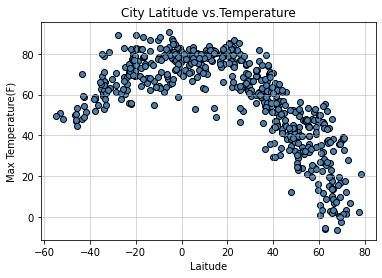

In [45]:

plt.scatter(data_df["Lat"], data_df["Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs.Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature(F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Max Temperature.png")

In [53]:
"""Seems that the highest temperatures are closes to the 0 latitude. Once you move on either side of the 0 mark, the temperature curves downward on both sides.""" 


'Seems that the highest temperatures are closes to the 0 latitude. Once you move on either side of the 0 mark, the temperature curves downward on both sides.'

## Latitude vs. Humidity Plot

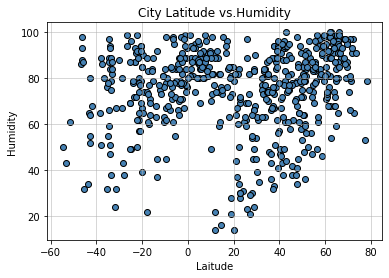

In [21]:

plt.scatter(data_df["Lat"], data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs.Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Humidity.png")

In [54]:
"""The further you go in the southern hemisphere, it appears that the humidity increases. But the northern hemisphere have lower humidity percentages"""

'The further you go in the southern hemisphere, it appears that the humidity increases. But the northern hemisphere have lower humidity percentages'

## Latitude vs. Cloudiness Plot

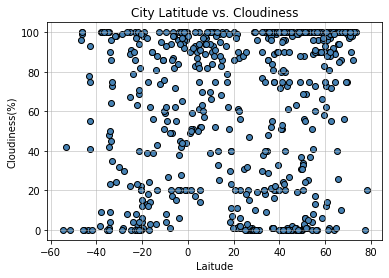

In [22]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(data_df["Lat"], data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness(%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

In [55]:
"""Cloudiness appears to vary wildely over the map."""

'Cloudiness appears to vary wildely over the map.'

## Latitude vs. Wind Speed Plot

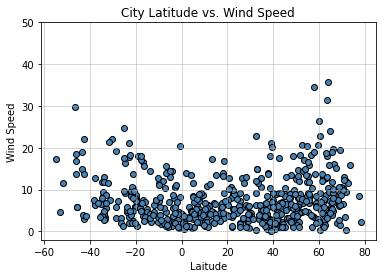

In [24]:
plt.scatter(data_df["Lat"], data_df["Wind"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed")


plt.xlabel("Laitude")
plt.ylabel("Wind Speed")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Wind Speed.png")

In [59]:
"""The further on the latitude scale you do, the speed of the wind seems to greatly increase overall."""

'The further on the latitude scale you do, the speed of the wind seems to greatly increase overall.'

## Linear Regression

In [25]:
north_hem = data_df.loc[data_df["Lat"] >= 0]
south_hem = data_df.loc[data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.85


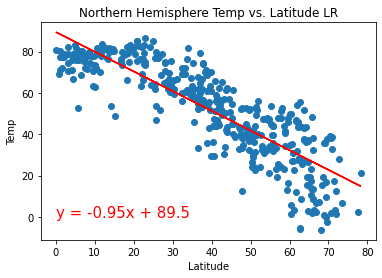

In [32]:
equation = linear_agression(north_hem["Lat"], north_hem["Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere Temp vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Temp")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [69]:
"""Since r is valued at a negative .8 there is quite a strong negative correlation."""

'Since r is valued at a negative .8 there is quite a strong negative correlation.'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.67


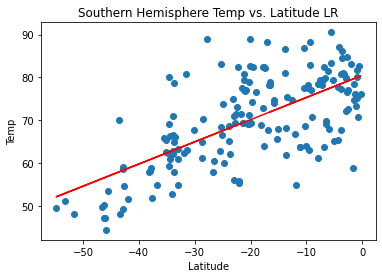

In [33]:
equation = linear_agression(south_hem["Lat"], south_hem["Temp"])

annotate(equation, 0, 0)
plt.title("Southern Hemisphere Temp vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Temp")
plt.savefig("../Images/Northern Hemisphere Temp vs. Latitude Linear Regression.png")

In [62]:
"""Above .5, r is considered to be moderately correlated. Since this is closer to .7 which is considered strong, I would surmize that there is actually a pretty strong correlation between the Southern Hemisphere's temperature and the latitude.""" 

"Above .5, r is considered to be moderately correlated. Since this is closer to .7 which is considered strong, I would surmize that there is actually a pretty strong correlation between the Southern Hemisphere's temperature and the latitude."

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


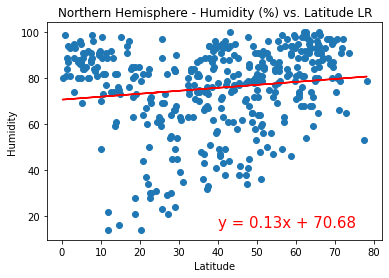

In [34]:
equation = linear_agression(north_hem["Lat"], north_hem["Humidity"])

annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [63]:
"""Here we again have little to no correlation between these two factors."""

'Here we again have little to no correlation between these two factors.'

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.24


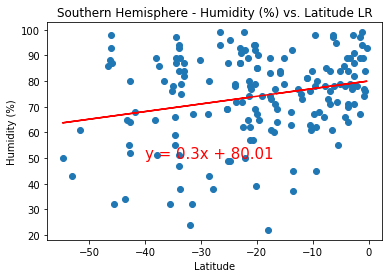

In [35]:
equation = linear_agression(south_hem["Lat"], south_hem["Humidity"])

annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/Southern Hemisphere Humidity vs. Latitude Linear Regression.png")

In [ ]:
"""Because of the proximity to .3, there is almost a sign of some correlation here though very weak at best."""

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.1


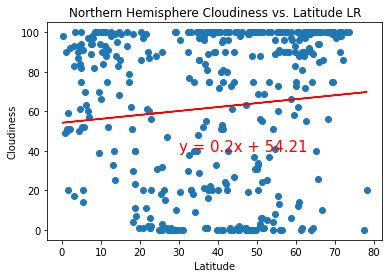

In [36]:
equation = linear_agression(north_hem["Lat"], north_hem["Cloudiness"])
annotate(equation, 30, 40)

plt.title("Northern Hemisphere Cloudiness vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [64]:
"""No correlations here at all."""

'No correlations here at all.'

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.15


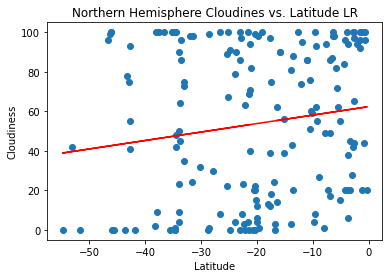

In [37]:
equation = linear_agression(south_hem["Lat"], south_hem["Cloudiness"])

annotate(equation, 30, 40)

plt.title("Northern Hemisphere Cloudines vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [66]:
"""Another two factors that are below the .3 threshold for minimum correlation."""

'Another two factors that are below the .3 threshold for minimum correlation.'

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.28


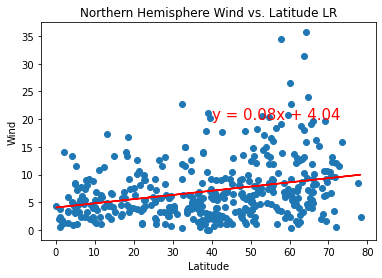

In [38]:
equation = linear_agression(north_hem["Lat"], north_hem["Wind"])

annotate(equation, 40, 20)
plt.title("Northern Hemisphere Wind vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Wind")

plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [67]:
""" A weak correlation here at best between the wind speed in the northern hemisphere and the latitude."""

' A weak correlation here at best between the wind speed in the northern hemisphere and the latitude.'

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.29


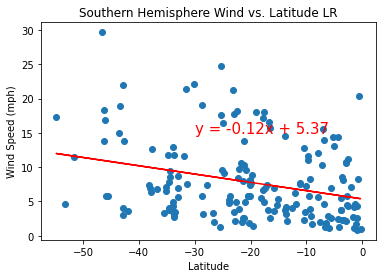

In [39]:
equation = linear_agression(south_hem["Lat"], south_hem["Wind"])

annotate(equation, -30, 15)

plt.title("Southern Hemisphere Wind vs. Latitude LR")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Southern Hemisphere - Wind vs. Latitude Linear Regression.png")

In [68]:
"""Because of the negative integer, here we can say there is a weak negative correlation."""

'Because of the negative integer, here we can say there is a weak negative correlation.'